# Lecture 6 worksheet

## Question 1 (True/False)

Indicate whether each of the following statements is True or False. **If a statement is False, provide a counterexample**.

### Q1.1 

Suppose your prior and your likelihood are both normally distributed. Then, the posterior will always have lower variance than the prior.

*Hint: You may find it helpful to experiment with the notebook from lecture.*

### **True**. You can verify this empirically by trying to add observations that are very far apart.

We can also verify it mathematically. [Wikipedia](https://en.wikipedia.org/wiki/Conjugate_prior#When_likelihood_function_is_a_continuous_distribution) tells us that given a prior mean $\mu_0$, a prior variance $\sigma_0^2$, and a likelihood model with known variance $\sigma^2$, then the posterior mean is:

$$\frac{1}{\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}} \left(\frac{\mu_0}{\sigma_0^2} + \frac{\sum_{i=1}^n x_i}{\sigma^2}\right),$$

and the posterior variance is

$$\left(\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}\right)^{-1}.$$



As $n$ (the number of observations) gets bigger, no matter what the observations themselves are, this variance will decrease.

### Q1.2
If your observations are binary and follow a Bernoulli distribution, then the prior distribution for the Bernoulli parameter (probability of being 1) must follow a Beta distribution.

### False.

You can choose any prior you want. We often choose the Beta distribution because (a) it is the conjugate prior to the Bernoulli likelihood, which makes computation easy; and (b) the Beta distribution is very flexible and supports many different "shapes".

## Question 2: choosing priors

Consider the following 3 prior distributions:

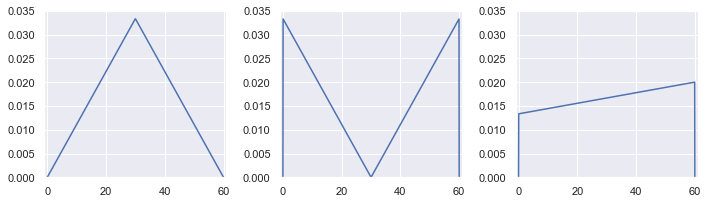

In [43]:
# You don't have to change any of the code here: 
# you'll use the generated plots to answer the questions below.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

N = 1000
x = np.linspace(0, 60, N)

prior_a = (x/900 * (x < 30)) + ((2/30 - x/900) * (x >= 30))
prior_b = 1/30 - prior_a
prior_b[0] = prior_b[-1] = 0
prior_c = np.linspace(1/60 * .8, 1/60 * 1.2, N)
prior_c[0] = prior_c[-1] = 0

figure, axes = plt.subplots(1, 3, figsize=(10, 3))
for ax, distribution in zip(axes, (prior_a, prior_b, prior_c)):
    ax.plot(x, distribution)
    ax.axis([-1, 61, 0, .035])
plt.tight_layout()

For each of the following questions, suppose we're going to use a Bayesian approach to answer it. Choose the best prior for the quantity described (must be one of a/b/c above), and briefly explain your choice.

*Note: it may be the case that none of the three is a "perfect" fit for the question: in that case, just choose the best one. We'll discuss these shortcomings in class: there may be more than one correct answer.*

### Q2.1
In a randomly chosen 1-hour-long class session at Berkeley, how long is the instructor talking?

### One possible answer is (c). Most values are roughly equally likely, but larger values are generally more probable than smaller ones.

### Q2.2
Suppose I sample the speed of my car in MPH every 5 minutes while I'm driving. What is the average speed of my car in MPH, assuming I never drive on the freeway?

### One possible answer is (a). If I never drive on the freeway, I'm probably driving on local roads in Berkeley, where the speed limit is usually 25-35MPH.

### Q2.3
Come up with your own modeling question here and describe it in 1-2 sentences. You should choose a question where one of the three priors above will be a good fit: tell us which one.

## Problem 3: Priors and normalization

*This question is a little longer than usual. If you're short on time, consider spending no more than 5 minutes each on the three parts Q3.1, Q3.2, and Q3.3, and submitting what you have then.*

In lecture, we mostly glossed over the "normalizing constants" in our probability distributions. In this problem, we'll look at when we can and can't get away with doing this.

Consider the Beta distribution, defined for values $\theta \in [0, 1]$:

$$ p(\theta) \propto \theta^{r-1}(1-\theta)^{s-1} $$

Remember that the symbol $\propto$ means "is proportional to". In other words:

$$ p(\theta) = \frac{\theta^{r-1}(1-\theta)^{s-1}}{Z}, $$

where $Z$ is a normalizing constant that doesn't depend on $\theta$ (but does depend on $r$ and $s$). We know that any probability density function must have a total area of 1: in other words, the integral over the entire range of values for the random variable must be 1. In other words:

$$
\int_0^1 \frac{\theta^{r-1}(1-\theta)^{s-1}}{Z} d\theta = 1\\
Z = \int_0^1 \theta^{r-1}(1-\theta)^{s-1} d\theta
$$

We can use some fancy integration techniques to show that:

$$ Z = \frac{\Gamma(r)\Gamma(s)}{\Gamma(r+s)} $$

(If you're curious, the [Gamma function](https://en.wikipedia.org/wiki/Gamma_function) $\Gamma(\cdot)$ is a generalization of the factorial function that also works for non-integer values).

Because we know these facts, any time we see a distribution (prior, posterior, conditional, etc.) $\theta$ that is proportional to $\theta^{r-1}(1-\theta)^{s-1}$ (no matter what $r$ and $s$ are), we're guaranteed that that it's a Beta distribution, and if we need to, we can compute the normalizing constant using the formula above.

### Q3.1

Suppose we have a parameter $\theta$ that we know is a continuous value between 0 and 4. You talk to a domain expert, who tells you that the best choice of prior is 

$$p(\theta) = \frac{\log(2+\sin(a\theta))}{Z}$$

for some number $a$, and some normalizing constant $Z$ (that depends on $a$).

Suppose that we don't know $Z$, and also suppose that we had no way of computing it. If we knew $a = 3$, then which of the following questions can we answer? For each one, respond with either "can answer" or "can't answer" and a brief explanation (if your response is "can answer", you don't need to provide an answer).

* Under the prior, is $\theta=1$ more likely than $\theta=3$?
* Under the prior, what is the probability that $\theta$ is between 2 and 4?
* What is the prior mean $E[\theta]$?
* Suppose you know the likelihood $p(x|\theta)$. What is the posterior, up to a normalizing constant? (In other words, can you find a function that the posterior is proportional to?)

### Answers:

* *can answer*: if we compute the ratio p(\theta=1)/p(\theta=3), the $Z$s will cancel and we can compare the relative densities under the prior [1]
* *can't answer*: In order to compute this, we need to compute $\int_0^4 p(\theta)d\theta$, which would require us to know $Z$.
* *can't answer*: like the previous question, we'd need to compute an integral: this time it's $\int_0^4 \theta p(\theta)d\theta$. We still run into the same problem where our answer would have a $Z$ in it.
* *can answer*: remember that the "posterior" is our belief about $\theta$ after observing $x$. In other words, it's the distribution $p(\theta|x)$, which we can compute using Bayes' rule:

$$p(\theta|x) = \frac{p(x|\theta)p(\theta)}{p(x)}$$

When thinking about this distribution $p(\theta|x)$ as a function of $\theta$ and for a particular value of $x$, then $p(x)$ is just a constant. We can simplify this by calling it $Z_2$, and rewrite:

$$p(\theta|x) = \frac{1}{Z \cdot Z_2} p(x|\theta)\log(2+\sin(a\theta))$$

### Q3.2

Consider the prior from the previous problem. Using Python, numerically compute the normalizing constant $Z$ if $a=4$. Remember, $\theta \in [0, 4]$.

*Hint: If you don't know what Python/NumPy/SciPy function to use, a quick web search might help you find what you need.*


### Answer:
We know that the PDF must integrate to 1, so we can set up an integral:

$$\int_0^4 \frac{\log(2+\sin(a\theta))}{Z}d\theta = 1$$

$$Z = \int_0^4 \log(2+\sin(a\theta))d\theta$$

We'll evaluate the integral numerically.

In [2]:
# Answer:
import numpy as np
from scipy import integrate
a = 4

theta = np.linspace(0, 4, 500)
prior = np.log(2 + np.sin(a * theta))
print(integrate.trapz(prior, theta))

2.76057953912958


### Q3.3

In most real-world problems, we're not estimating just one single scalar parameter $\theta$, but an entire collection of them. Suppose we're building a model to address the spread of disinformation in social media. Let $\theta_i$ be the probability that a user $i$'s posts will contain disinformation, and suppose there are $K$ users we're interested in (in other words, $i=1, \ldots, K$).

To simplify, we'll use a prior that assumes all the $\theta_i$s are indepdendent, and that each one is uniformly distributed between 0 and 1. But our likelihood of seeing disinformation in posts $x_1, \ldots x_n$ is more complicated, because it has to account for the fact that users who post disinformation are more likely to share other users' posts with disinformation, etc. So, our likelihood $p(x_1, \ldots, x_n | \theta_1, \ldots, \theta_K)$ will be complicated, but you can assume that you're given Python code that computes it.

For each of the situations below, can you compute the posterior exactly (using either numerical techniques or conjugacy)? Why or why not? Note that you don't have to actually compute it, just explain why it is or isn't feasible.

(a) $K=1$, likelihood is Bernoulli: each post from user $i$ contains disinformation with probability $\theta_i$, indepdenent of all other users

(b) $K=1000$, likelihood is Bernoulli: each post from user $i$ contains disinformation with probability $\theta_i$, indepdenent of all other users)

(c) $K=1$, likelihood is more complex (but given to you as a python function)

(d) $K=1000$, likelihood is more complex (but given to you as a python function)

**Answer:**

(a) **Yes**: if the likelihood is Bernoulli, then the prior and likelihood are conjugate (since the uniform is a special case of the Beta), so we can compute the posterior by just adding counts.

(b) **Yes**: We can compute the posterior for each user separately, since they're indepdendent in both the prior and the likelihood.

(c) **Yes** (mostly): for a particular value of $x_1, \ldots, x_n$, we can compute the posterior using Bayes' rule:

$$p(\theta_1|x_1, \ldots, x_n) = \frac{p(x_1, \ldots, x_n|\theta_1)p(\theta_1)}{p(x_1, \ldots, x_n)}$$

We can plug in the values for $x_1, \ldots, x_n$ that we observed, and then use numerical integration as in Q3.2, integrating over $\int_{\theta_1=0}^{\theta_1=1}$.

(d) **No**: We can start with a similar computation as (c) using Bayes' rule, but numerical integration is no longer an option. If we were to try, we'd have to compute a thousand-dimensional integral! In our Python code above, we created an array with 500 different values of $\theta$ between 0 and 1. If we wanted to do something similar, we'd start by thinking about 500 values for $\theta_1$, 500 values for $\theta_2$, and so on. But it's actually much worse than that: for each of the 500 possible values of $\theta_1$, we'd have to evaluate our function at 500 values of $\theta_2$. And for each of those 250,000 points, we'd have to evaluate the function at 500 values of $\theta_3$, and so on. So, we'll end up with $500^{1000}$ possible values of the parameters that we have to evaluate our function at, just to compute the integral.